# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px


In [ ]:
 #Initializing Plotly

In [ ]:
import plotly.io as pio
pio.render = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv('AMZN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-22,2684.500000,2715.000000,2669.000000,2713.820068,2713.820068,3208800
1,2020-06-23,2726.020020,2783.110107,2718.040039,2764.409912,2764.409912,4231700
2,2020-06-24,2780.000000,2796.000000,2721.000000,2734.399902,2734.399902,4526600
3,2020-06-25,2739.550049,2756.229980,2712.139893,2754.580078,2754.580078,2968700
4,2020-06-26,2775.060059,2782.570068,2688.000000,2692.870117,2692.870117,6500800
...,...,...,...,...,...,...,...
246,2021-06-14,3346.830078,3385.000000,3335.500000,3383.870117,3383.870117,2569700
247,2021-06-15,3384.000000,3396.989990,3363.110107,3383.129883,3383.129883,2426200
248,2021-06-16,3392.000000,3426.350098,3360.530029,3415.250000,3415.250000,4202800
249,2021-06-17,3403.179932,3497.199951,3401.000000,3489.239990,3489.239990,5136500


In [ ]:
#read_csv function from pandas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,3192.226339,3228.416803,3149.791512,3188.460310,3188.460310,4.214336e+06
std,147.783464,145.079290,148.452314,145.701418,145.701418,1.474292e+06
min,2684.500000,2696.800049,2630.080078,2680.379883,2680.379883,1.451900e+06
25%,3116.344971,3143.849976,3075.930054,3104.854981,3104.854981,3.122650e+06
50%,3194.000000,3224.000000,3154.179932,3187.010010,3187.010010,3.936100e+06
75%,3292.295044,3321.954956,3246.474976,3286.090088,3286.090088,5.056150e+06
max,3547.000000,3554.000000,3486.689941,3531.449951,3531.449951,8.892600e+06


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x='Date',y='Close' ) 

In [ ]:
px.line(df,x='Date',y='Close')

In [ ]:
px.bar(df,y='Volume')

In [ ]:
px.box(df, y='Close')

# Understanding Facebook Prophet

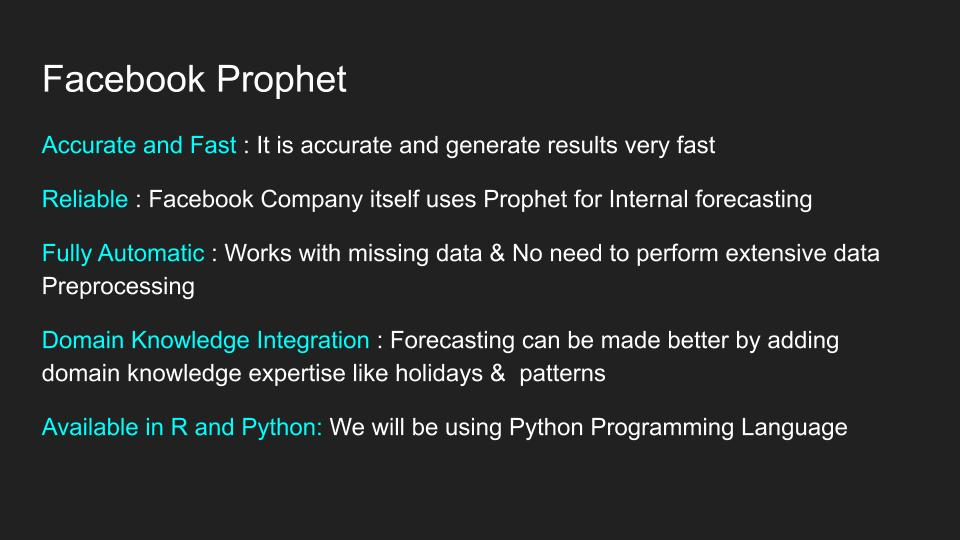

## Data Preperation

In [ ]:
columns = ['Date','Close']
ndf = pd.DataFrame(df,columns = columns)
ndf

,Date,Close
0,2020-06-22,2713.820068
1,2020-06-23,2764.409912
2,2020-06-24,2734.399902
3,2020-06-25,2754.580078
4,2020-06-26,2692.870117
...,...,...
246,2021-06-14,3383.870117
247,2021-06-15,3383.129883
248,2021-06-16,3415.250000
249,2021-06-17,3489.239990


In [ ]:
prophet_df = ndf.rename(columns = {'Date':'ds','Close':'y'})

## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-22,2846.636815,2724.299349,3012.100423,2846.636815,2846.636815,22.830373,22.830373,22.830373,22.830373,22.830373,22.830373,0.0,0.0,0.0,2869.467188
1,2020-06-23,2852.402316,2733.603621,3029.187212,2852.402316,2852.402316,29.560614,29.560614,29.560614,29.560614,29.560614,29.560614,0.0,0.0,0.0,2881.962929
2,2020-06-24,2858.167816,2756.133799,3030.839217,2858.167816,2858.167816,32.770131,32.770131,32.770131,32.770131,32.770131,32.770131,0.0,0.0,0.0,2890.937947
3,2020-06-25,2863.933316,2756.741678,3025.528775,2863.933316,2863.933316,28.916102,28.916102,28.916102,28.916102,28.916102,28.916102,0.0,0.0,0.0,2892.849419
4,2020-06-26,2869.698817,2752.056348,3032.175442,2869.698817,2869.698817,22.906631,22.906631,22.906631,22.906631,22.906631,22.906631,0.0,0.0,0.0,2892.605448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-07-14,3350.657186,3236.316454,3530.455263,3340.221902,3359.635504,32.770131,32.770131,32.770131,32.770131,32.770131,32.770131,0.0,0.0,0.0,3383.427317
277,2021-07-15,3352.240449,3254.131398,3522.451785,3341.000575,3362.041647,28.916102,28.916102,28.916102,28.916102,28.916102,28.916102,0.0,0.0,0.0,3381.156552
278,2021-07-16,3353.823713,3232.191342,3511.645941,3341.909799,3364.360177,22.906631,22.906631,22.906631,22.906631,22.906631,22.906631,0.0,0.0,0.0,3376.730344
279,2021-07-17,3355.406976,3136.465976,3432.697880,3342.789341,3366.715580,-68.491926,-68.491926,-68.491926,-68.491926,-68.491926,-68.491926,0.0,0.0,0.0,3286.915050


In [ ]:
px.line(forecast,x='ds',y='yhat')

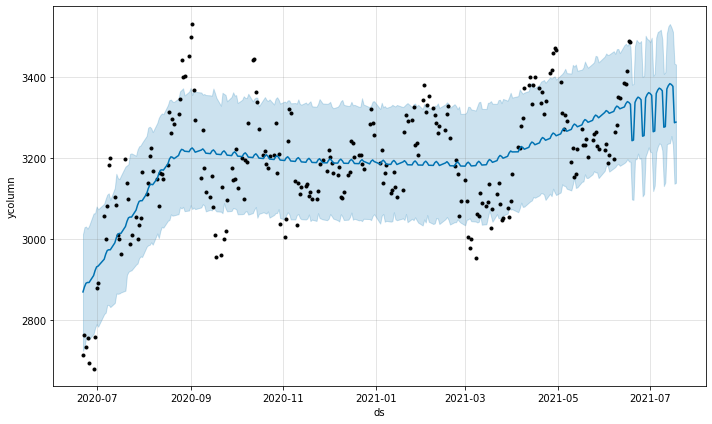

In [ ]:
figure = m.plot(forecast,xlabel='ds',ylabel='ycolumn')

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>